In [55]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
import psycopg2
import config
from config import db_pw

In [56]:
#establishing the connection
conn = psycopg2.connect(
   database="Predictive_Senescence_DB", user='postgres', password= db_pw, host='predictive-senescence-db.cbunnafql9ym.us-east-2.rds.amazonaws.com', port= '5432'
)

#Setting auto commit false
conn.autocommit = True

#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Retrieving data
cursor.execute('''SELECT * from birds_data_raw''')

#Fetching 1st row from the table
df = pd.DataFrame(cursor.fetchall(), columns=["Collection_Num", "BirdID", "Sex", "AgeY", "AgeClass", "BirthFPID", "U_PlateID", "RTL", "Technician", "Terr", "FPID", 'mum', 'dad', "MAC", 'PAC','BrF', 'BrM']);
print(df)

#Commit your changes in the database
conn.commit()

#Closing the connection
conn.close()

      Collection_Num  BirdID  Sex       AgeY AgeClass  BirthFPID U_PlateID  \
0                  1    5511    0   0.246575        J        103       9_3   
1                  2    5559    1   3.597260        A        103       9_1   
2                  3    5559    1   4.715068        A        103      9_28   
3                  4    5559    1   0.657534       SA        103       9_2   
4                  5    5527    1   0.328767      OFL        103       9_3   
...              ...     ...  ...        ...      ...        ...       ...   
2657            2658     221    1   6.958904        A          8       2_1   
2658            2659     216    1   8.947945        A          8       8_8   
2659            2660     176    1   6.772603        A          8      7_32   
2660            2661     221    1   9.090411        A          8      1_12   
2661            2662     176    1  13.873973        A          8       4_3   

       RTL  Technician   Terr  FPID   mum   dad       MAC      

In [57]:
sub_df= df[['AgeY', 'RTL','AgeClass']]
sub_df.head()

,AgeY,RTL,AgeClass
0,0.246575,1.06,J
1,3.597260,0.52,A
2,4.715068,1.07,A
3,0.657534,0.99,SA
4,0.328767,1.02,OFL


In [58]:

m_sub_df= sub_df.groupby(df.AgeClass).mean()
m_sub_df

,AgeY,RTL
AgeClass,,
A,4.361859,0.876864
CH,0.028429,1.080370
FL,0.156411,1.053764
J,0.300449,0.963628
OFL,0.349101,0.908246
SA,0.839918,0.900535


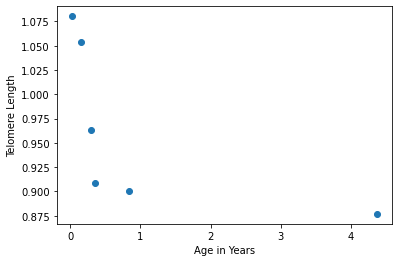

In [59]:
import matplotlib.pyplot as plt
plt.scatter(m_sub_df.AgeY, m_sub_df.RTL)
plt.xlabel('Age in Years')
plt.ylabel('Telomere Length')
plt.show()

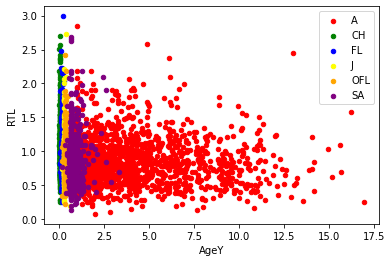

In [60]:
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
AgeY= sub_df['AgeY']
RTL=sub_df['RTL']
AgeClass=sub_df['AgeClass']
dfp1= pd.DataFrame(dict(AgeY=AgeY, RTL=RTL, AgeClass=AgeClass))
#fig, ax = plt.subplots()
#colors = {'A':'red', 'CH':'green', 'FL':'blue', 'J':'yellow', 'OFL':'orange', 'SA':'purple'}
#ax.scatter(df['AgeY'], df['RTL'], c=df['AgeClass'].map(colors))
#plt.show()


fig, ax = plt.subplots()

colors = {'A':'red', 'CH':'green', 'FL':'blue', 'J':'yellow', 'OFL':'orange', 'SA':'purple'}

grouped = dfp1.groupby('AgeClass')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='AgeY', y='RTL', label=key, color=colors[key])

plt.show()

<AxesSubplot:title={'center':'RTL'}, xlabel='[AgeClass]'>

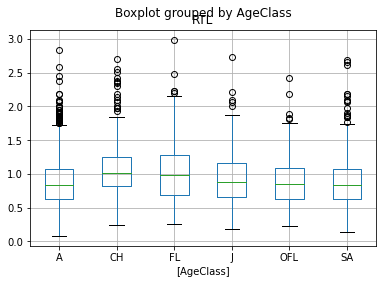

In [61]:
from matplotlib import pyplot as plt
# Plot boxplots of RTL by AgeClass
sub_df.boxplot(['RTL'], by=['AgeClass'])

In [62]:
# cold combine (green and blue CH, FL, ) ( yellow and orange J, and OFL)  and keep purple AS and red A seperate

In [63]:
sub_df['AgeClass'].value_counts()

A      1387
SA      449
CH      324
OFL     211
FL      178
J       113
Name: AgeClass, dtype: int64

In [64]:
# add Age_CAt to the sub_df dataframe
# https://www.youtube.com/watch?v=to5xBubdcqo

sub_df['AgeClass']= sub_df['AgeClass'].replace({"FL":"CH"})
sub_df['AgeClass']= sub_df['AgeClass'].replace({"OFL":"J"})
sub_df['AgeClass']= sub_df['AgeClass'].replace({"SA":"A"})
sub_df['AgeClass'].value_counts()
sub_df.head()

,AgeY,RTL,AgeClass
0,0.246575,1.06,J
1,3.597260,0.52,A
2,4.715068,1.07,A
3,0.657534,0.99,A
4,0.328767,1.02,J


<AxesSubplot:title={'center':'RTL'}, xlabel='[AgeClass]'>

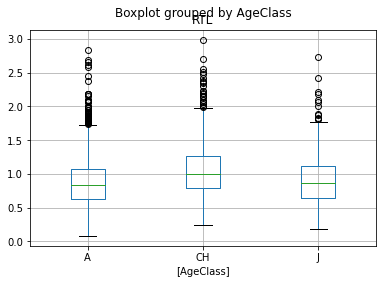

In [65]:
from matplotlib import pyplot as plt
# Plot boxplots of RTL by AgeClass
sub_df.boxplot(['RTL'], by=['AgeClass'])

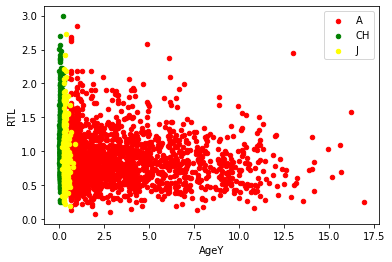

In [66]:
# https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
AgeY= sub_df['AgeY']
RTL=sub_df['RTL']
AgeClass=sub_df['AgeClass']
dfp2= pd.DataFrame(dict(AgeY=AgeY, RTL=RTL, AgeClass=AgeClass))
#fig, ax = plt.subplots()
#colors = {'A':'red', 'CH':'green', 'FL':'blue', 'J':'yellow', 'OFL':'orange', 'SA':'purple'}
#ax.scatter(df['AgeY'], df['RTL'], c=df['AgeClass'].map(colors))
#plt.show()


fig, ax = plt.subplots()

colors = {'A':'red', 'CH':'green', 'FL':'blue', 'J':'yellow', 'OFL':'orange', 'SA':'purple'}

grouped = dfp2.groupby('AgeClass')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='AgeY', y='RTL', label=key, color=colors[key])

plt.show()

In [67]:
# evaluate the the age classes
sub_df['AgeClass'].value_counts()

A     1836
CH     502
J      324
Name: AgeClass, dtype: int64

In [68]:
df.head()

,Collection_Num,BirdID,Sex,AgeY,AgeClass,BirthFPID,U_PlateID,RTL,Technician,Terr,FPID,mum,dad,MAC,PAC,BrF,BrM
0,1,5511,0,0.246575,J,103,9_3,1.06,1,10.0,104,4863,1762,3.920548,7.443836,4863,1762
1,2,5559,1,3.597260,A,103,9_1,0.52,1,77.1,122,1716,1877,7.416438,6.235616,1716,4892
2,3,5559,1,4.715068,A,103,9_28,1.07,1,77.1,125,1716,1877,7.416438,6.235616,1716,4892
3,4,5559,1,0.657534,SA,103,9_2,0.99,1,111.0,104,1716,1877,7.416438,6.235616,1716,4892
4,5,5527,1,0.328767,OFL,103,9_3,1.02,1,131.0,104,4936,1710,3.452055,7.778082,1707,1710


In [69]:
# include only varaibles for model- drop ID variables
X = df[['Sex','AgeY', 'RTL', 'Terr', 'MAC', 'PAC', 'mum', 'dad','BrF', 'BrM']].copy()


X = X.dropna()
X.head()


,Sex,AgeY,RTL,Terr,MAC,PAC,mum,dad,BrF,BrM
0,0,0.246575,1.06,10.0,3.920548,7.443836,4863,1762,4863,1762
1,1,3.597260,0.52,77.1,7.416438,6.235616,1716,1877,1716,4892
2,1,4.715068,1.07,77.1,7.416438,6.235616,1716,1877,1716,4892
3,1,0.657534,0.99,111.0,7.416438,6.235616,1716,1877,1716,4892
4,1,0.328767,1.02,131.0,3.452055,7.778082,4936,1710,1707,1710


In [70]:
# transform Ageclass strings to number lables
y= sub_df[['AgeClass']]
y['AgeClass'] = LabelEncoder().fit_transform(y['AgeClass'])
y.head()

,AgeClass
0,2
1,0
2,0
3,0
4,2


In [71]:
#d_df= df.drop(["BirdID", "BirthFPID", "U_PlateID", "Technician", "FPID", "mum", "dad" ], axis=1)
#d_df.head()

In [72]:
# did not standardize because AgeClass, Terr, mum, dad, brf, brm are all categorical or IDs 
# it doesnt make sence to standardize them

In [73]:
# Initialize PCA model- there are 3 AgeClasses
pca = PCA(n_components=3)

In [74]:
# Get six principal components .
telo_pca = pca.fit_transform(X)

In [75]:
df_telo_pca=pd.DataFrame(data=telo_pca, columns=["principal component 1", "principal component 2", "principal component 3"])
df_telo_pca.head()

,principal component 1,principal component 2,principal component 3
0,2783.924327,-2816.614257,322.675316
1,1028.133314,2166.011781,1525.579074
2,1028.132914,2166.011767,1525.579143
3,1028.178358,2165.988216,1525.605746
4,1190.286466,-1410.424472,-777.216967


In [76]:
# Find the best value for K
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_telo_pca)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

C:\Users\jamesbe\Anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.



:Curve   [k]   (inertia)

In [77]:
# Initialize the K-means model for 3 classes
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_telo_pca)

# Predict clusters
predictions = model.predict(df_telo_pca)

# Add the predicted class columns
df_telo_pca["class"] = model.labels_
df_telo_pca.head()

,principal component 1,principal component 2,principal component 3,class
0,2783.924327,-2816.614257,322.675316,2
1,1028.133314,2166.011781,1525.579074,2
2,1028.132914,2166.011767,1525.579143,2
3,1028.178358,2165.988216,1525.605746,2
4,1190.286466,-1410.424472,-777.216967,2


In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import hvplot.pandas

In [79]:
import plotly.figure_factory as ff

In [80]:
# Create the dendrogram
fig = ff.create_dendrogram(df_telo_pca, color_threshold=0)
fig.update_layout(width=1000, height=800)
fig.show()

In [81]:
# Hierarchical Clustering- Agglomerative clustering

In [82]:
agg = AgglomerativeClustering(n_clusters=3)
model = agg.fit(df_telo_pca)

In [83]:
# add class columns to df_iris_pca
df_telo_pca["class"]=model.labels_
df_telo_pca.head()

,principal component 1,principal component 2,principal component 3,class
0,2783.924327,-2816.614257,322.675316,2
1,1028.133314,2166.011781,1525.579074,0
2,1028.132914,2166.011767,1525.579143,0
3,1028.178358,2165.988216,1525.605746,0
4,1190.286466,-1410.424472,-777.216967,2


In [94]:
map_dict = {0:'Chick', 1:'Juvenile', 2:'Adult'}
df_telo_pca['class'] = df_telo_pca['class'].map(map_dict)
df_telo_pca

,principal component 1,principal component 2,principal component 3,class
0,2783.924327,-2816.614257,322.675316,Adult
1,1028.133314,2166.011781,1525.579074,Chick
2,1028.132914,2166.011767,1525.579143,Chick
3,1028.178358,2165.988216,1525.605746,Chick
4,1190.286466,-1410.424472,-777.216967,Adult
...,...,...,...,...
2657,-3986.124801,-89.985444,-165.314143,Chick
2658,-3986.118992,-89.988962,-165.310023,Chick
2659,-3986.106540,-89.995199,-165.303033,Chick
2660,-3986.125531,-89.985483,-165.313973,Chick


In [84]:
# create plot 
df_telo_pca.hvplot.scatter(
    x="principal component 1",
    y="principal component 2",
    hover_cols=["class"],
    by="class",
)

:NdOverlay   [class]
   :Scatter   [principal component 1]   (principal component 2,class)

In [85]:
# create plot 
df_telo_pca.hvplot.scatter(
    x="principal component 1",
    y="principal component 3",
    hover_cols=["class"],
    by="class",
)

:NdOverlay   [class]
   :Scatter   [principal component 1]   (principal component 3,class)

In [86]:
# create plot 
df_telo_pca.hvplot.scatter(
    x="principal component 2",
    y="principal component 3",
    hover_cols=["class"],
    by="class",
)

:NdOverlay   [class]
   :Scatter   [principal component 2]   (principal component 3,class)

In [87]:
# Function to cluster and plot dataset
def test_cluster_amount(df, clusters):
    model = KMeans(n_clusters=clusters, random_state=5)
    model

    # Fitting model
    model.fit(df)

    # Add a new class column to df_iris
    df["class"] = model.labels_

In [88]:
# two clusters
test_cluster_amount(X, 2)
X.hvplot.scatter(x="AgeY", y="RTL", by="class")

:NdOverlay   [class]
   :Scatter   [AgeY]   (RTL)

In [89]:
# 3 clusters
test_cluster_amount(X, 3)
X.hvplot.scatter(x="AgeY", y="RTL", by="class")

:NdOverlay   [class]
   :Scatter   [AgeY]   (RTL)